In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

In [2]:
!apt-get update
!apt-get install -y iverilog

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,148 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,267 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,932 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:13 https://developer.download.nv

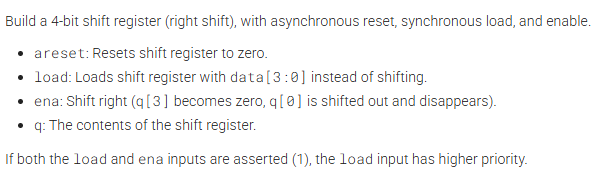

In [3]:
#shift4
%%writefile shiftreg.v
module top_module(
    input clk,
    input areset,  // async active-high reset to zero
    input load,
    input ena,
    input [3:0] data,
    output reg [3:0] q);


    always @(posedge clk, posedge areset)
        begin
            if(areset)
                q <= 0;
            else if(load)
                q <= data;
            else if(ena)
                begin
                    q <= {1'b0,q[3:1]};
                end
        end


endmodule


Writing shiftreg.v


Installing. Please wait... done!


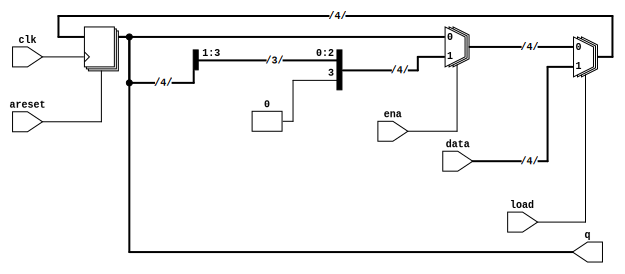

In [4]:
%%print_verilog
module top_module(
    input clk,
    input areset,  // async active-high reset to zero
    input load,
    input ena,
    input [3:0] data,
    output reg [3:0] q);


    always @(posedge clk, posedge areset)
        begin
            if(areset)
                q <= 0;
            else if(load)
                q <= data;
            else if(ena)
                begin
                    q <= {1'b0,q[3:1]};
                end
        end


endmodule


In [23]:
%%writefile tb.v
`timescale 1ns/1ns

module tb;
  reg clk_tb, areset_tb, load_tb, ena_tb; reg [3:0] data_tb; wire[3:0] q_tb;

  parameter CYCLE = 10;

  top_module top(.clk(clk_tb), .areset(areset_tb), .load(load_tb), .ena(ena_tb), .data(data_tb), .q(q_tb));

  task initialize;
  begin
  {clk_tb, areset_tb, load_tb, ena_tb, data_tb}=8'b11000000;
  end
  endtask

  task load_in(input [3:0] i);
  begin
  @(posedge clk_tb)
  load_tb=1'b1;
  data_tb=i;
  end
  endtask

  initial begin
  $dumpfile("tb.vcd");
  $dumpvars(0, tb);
  initialize;
  #1 areset_tb = 1'b0;
  #2 load_in(4'b1011);
  #1 load_tb = 0;
  ena_tb = 1'b1;
  #5 $finish;
  end

  initial
    begin
      $monitor("Inputs clock=%b areset=%b load=%b enable=%b data=%b output=%b",clk_tb,areset_tb,load_tb, ena_tb, data_tb, q_tb);
    end

  always begin
    #(CYCLE/10);
    clk_tb = 1;
    #(CYCLE/10);
    clk_tb = 0;
  end
  endmodule


Overwriting tb.v


In [24]:
!iverilog -o tb.out shiftreg.v tb.v
!vvp tb.out

VCD info: dumpfile tb.vcd opened for output.
Inputs clock=1 areset=1 load=0 enable=0 data=0000 output=0000
Inputs clock=1 areset=0 load=0 enable=0 data=0000 output=0000
Inputs clock=0 areset=0 load=0 enable=0 data=0000 output=0000
Inputs clock=1 areset=0 load=1 enable=0 data=1011 output=1011
Inputs clock=0 areset=0 load=0 enable=1 data=1011 output=1011
Inputs clock=1 areset=0 load=0 enable=1 data=1011 output=0101
Inputs clock=0 areset=0 load=0 enable=1 data=1011 output=0101
Inputs clock=1 areset=0 load=0 enable=1 data=1011 output=0010
Inputs clock=0 areset=0 load=0 enable=1 data=1011 output=0010
Inputs clock=1 areset=0 load=0 enable=1 data=1011 output=0001


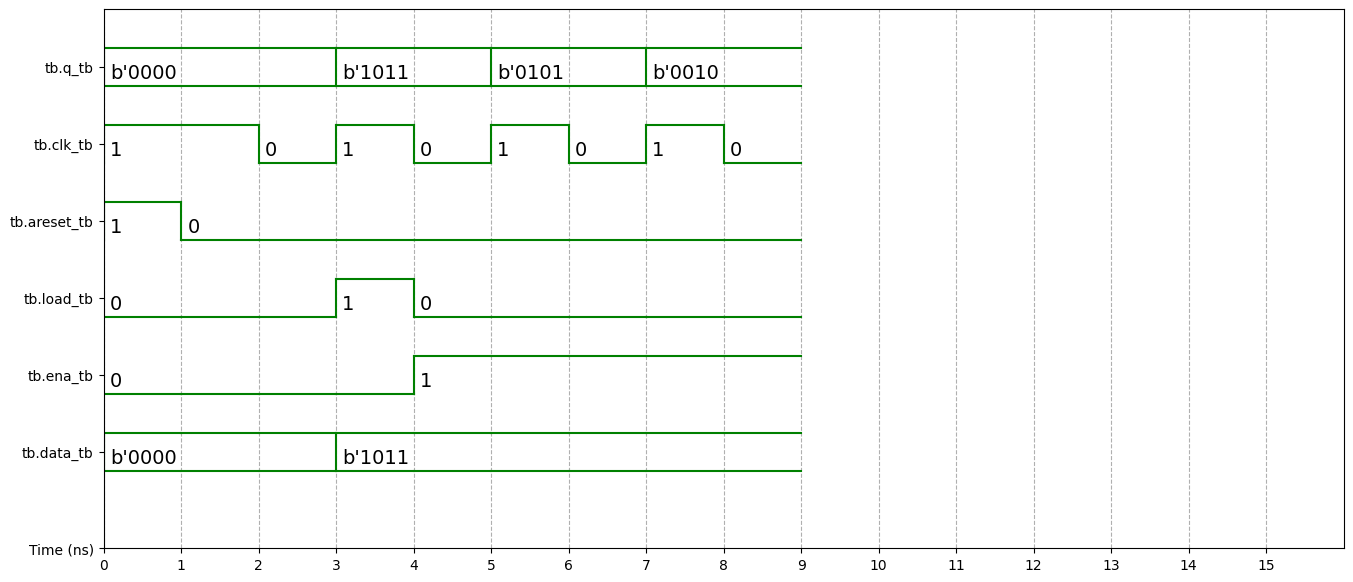

In [25]:
%%waveform tb.vcd
sign_list = ['tb.q_tb', 'tb.clk_tb', 'tb.areset_tb', 'tb.load_tb', 'tb.ena_tb', 'tb.data_tb']  # Ensure this matches the signal name in the testbench
time_begin = 0
time_end = 15
base = 'bin'

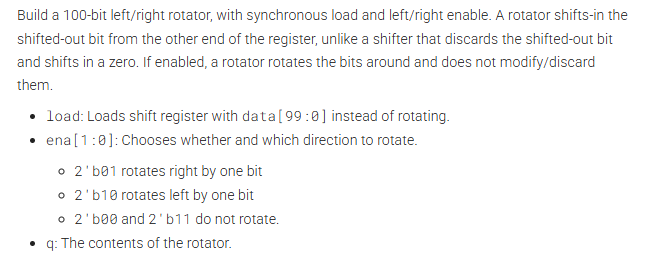

In [26]:
#rotate100
%%writefile shiftreg.v
module top_module(
    input clk,
    input load,
    input [1:0] ena,
    input [99:0] data,
    output reg [99:0] q);

     always @(posedge clk)
        begin
            if(load)
                q <= data;
            else if(ena == 2'b10)
                q <= {q[98:0], q[99]};
            else if(ena == 2'b01)
                q <= {q[0], q[99:1]};
        end

endmodule


Overwriting shiftreg.v


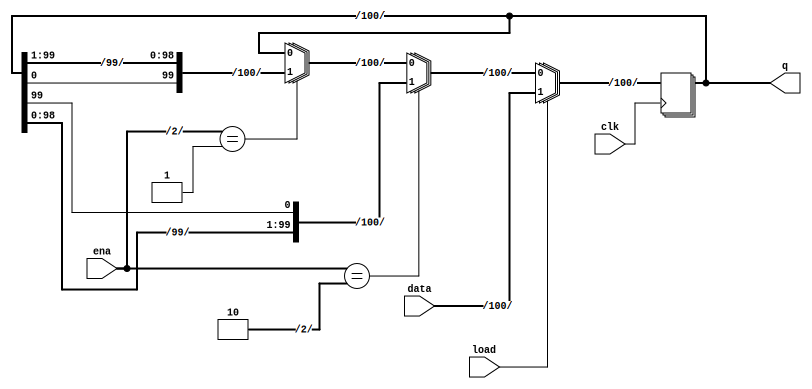

In [27]:
%%print_verilog
module top_module(
    input clk,
    input load,
    input [1:0] ena,
    input [99:0] data,
    output reg [99:0] q);

     always @(posedge clk)
        begin
            if(load)
                q <= data;
            else if(ena == 2'b10)
                q <= {q[98:0], q[99]};
            else if(ena == 2'b01)
                q <= {q[0], q[99:1]};
        end

endmodule


In [37]:
%%writefile tb.v
`timescale 1ns/1ns

module tb;
  reg clk_tb, load_tb; reg [1:0] ena_tb; reg [99:0] data_tb; wire[99:0] q_tb;

  parameter CYCLE = 10;

  top_module top(.clk(clk_tb), .load(load_tb), .ena(ena_tb), .data(data_tb), .q(q_tb));

  task initialize;
  begin
  {clk_tb, load_tb, ena_tb}=3'b100;
  end
  endtask

  task load_in(input [99:0] i);
  begin
  @(posedge clk_tb)
  load_tb=1'b1;
  data_tb=i;
  @(posedge clk_tb)
  load_tb=1'b0;
  end
  endtask

  initial begin
  $dumpfile("tb.vcd");
  $dumpvars(0, tb);
  initialize;
  #2 load_in(100'd1011);
  ena_tb = 2'b10;
  #5 ena_tb = 2'b01;
  #8 $finish;
  end

  initial
    begin
      $monitor("Time = %0t ns | clock=%b load=%b enable=%b data=%d output=%d", $time, clk_tb,load_tb, ena_tb, data_tb, q_tb);
    end

  always begin
    #(CYCLE/10);
    clk_tb = 1;
    #(CYCLE/10);
    clk_tb = 0;
  end
  endmodule


Overwriting tb.v


In [38]:
!iverilog -o tb.out shiftreg.v tb.v
!vvp tb.out

VCD info: dumpfile tb.vcd opened for output.
Time = 0 ns | clock=0 load=1 enable=00 data=                              x output=                              x
Time = 1 ns | clock=1 load=1 enable=00 data=                              x output=                              x
Time = 2 ns | clock=0 load=1 enable=00 data=                              x output=                              x
Time = 3 ns | clock=1 load=1 enable=00 data=                           1011 output=                           1011
Time = 4 ns | clock=0 load=1 enable=00 data=                           1011 output=                           1011
Time = 5 ns | clock=1 load=0 enable=10 data=                           1011 output=                           1011
Time = 6 ns | clock=0 load=0 enable=10 data=                           1011 output=                           1011
Time = 7 ns | clock=1 load=0 enable=10 data=                           1011 output=                           2022
Time = 8 ns | clock=0 load=0 enable

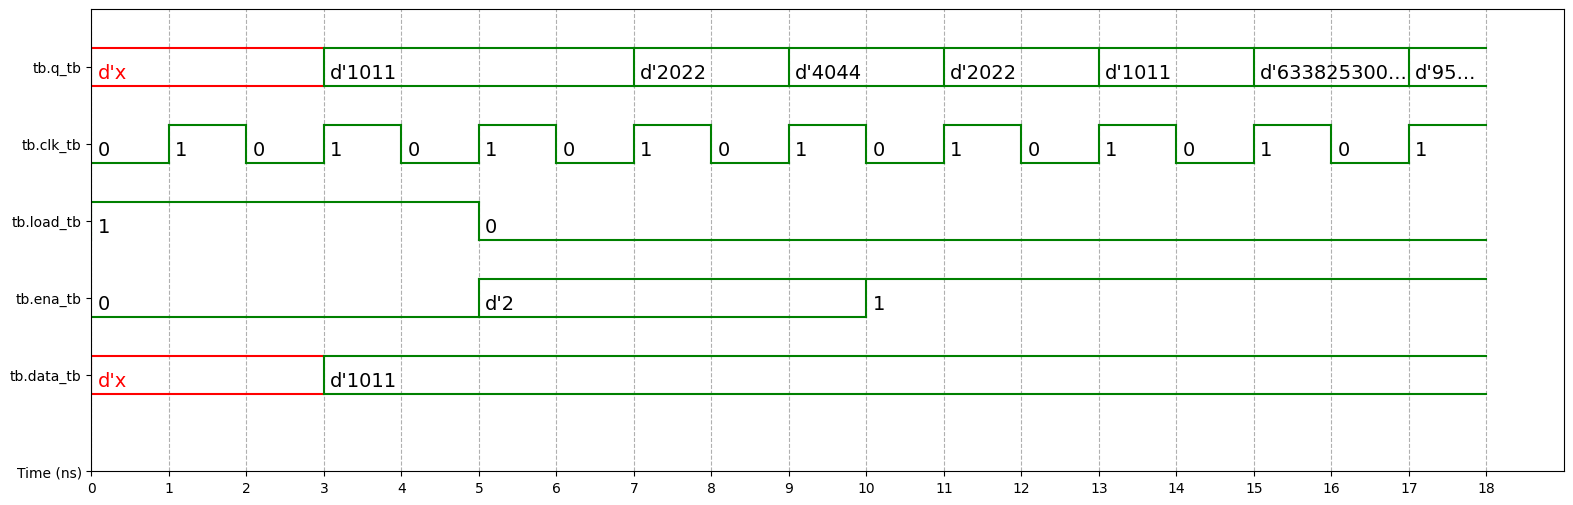

In [39]:
%%waveform tb.vcd
sign_list = ['tb.q_tb', 'tb.clk_tb', 'tb.load_tb', 'tb.ena_tb', 'tb.data_tb']  # Ensure this matches the signal name in the testbench
time_begin = 0
time_end = 18
base = 'dec'